## Модель

Как мы с вами обсудили на лекции -- одним из основных блоков программы для обучения нейронных сетей является *описание модели*.

Что такое модель? Вне зависимости от используемого фреймворка, это блок кода, который показывает нашей программе как исходные признаки должны быть преобразованы в предсказания модели.

А вот само определение модели зависит от фреймворка и каждый из них предлагает свою структуру (правила) описания моделей (которые сейчас становятся все более похожи друг на друга). Структура необходима для того, чтобы фреймворк мог построить вычислительный граф и мог правильно считать его производные.

## Keras API для Tensorflow

Изучение Tensorflow мы начнем сразу с высокоуровневого интерфейса Keras, который считается основным интерфейсом для реализации нейронных сетей в tensorflow и с недавних пор является его частью. Теоретически, все, что мы будем делаем можно реализовать без использования Keras, но в таком случае нам придется писать и тестировать большое количество самописных классов и функций, что не является целью данного блока


## Модель в Keras

 Модель в Keras -- это объект класса **tf.keras.Model**

In [1]:
import tensorflow as tf

2024-05-01 16:06:40.450891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 16:06:41.339401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = tf.keras.Model()
type(model)

keras.src.models.model.Model

In [3]:
tf.keras.Model?
"`Model` groups layers into an object with training and inference features."

'`Model` groups layers into an object with training and inference features.'

Init signature: tf.keras.Model(*args, **kwargs)
Docstring:     
A model grouping layers into an object with training/inference features.

There are three ways to instantiate a `Model`:

## With the "Functional API"

You start from `Input`,
you chain layer calls to specify the model's forward pass,
and finally you create your model from inputs and outputs:

```python
inputs = keras.Input(shape=(37,))
x = keras.layers.Dense(32, activation="relu")(inputs)
outputs = keras.layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
```

Note: Only dicts, lists, and tuples of input tensors are supported. Nested
inputs are not supported (e.g. lists of list or dicts of dict).

A new Functional API model can also be created by using the
intermediate tensors. This enables you to quickly extract sub-components
of the model.

Example:

```python
inputs = keras.Input(shape=(None, None, 3))
processed = keras.layers.RandomCrop(width=128, height=128)(inputs)
conv = ker

Из документации видно, что модель -- работает со слоями. Что же такое слой? Если смотреть на модель как на конструктор, то слой -- это кубик.

Другими словами слой -- это слой нейронной сети. Их типов существует [очень много](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Но на данный момент мы знаем только один слой -- полносвязный. Давайте посмотрим, как его определить в Keras.


### Полносвязный слой
Полносвязный слой в Tensorflow называется Dense и живет в tensorflow.keras.layers.

In [4]:
from tensorflow.keras.layers import Dense
import numpy as np
Dense?

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: If the input to the layer has a rank greater than 2, `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0, d1)`, then we create

Он имеет следующие параметры (показаны лишь самые основные):

```
Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', ...)
```


*   units -- количество нейронов на выходе из слоя
*   activation -- функция активации, например "sigmoid", "relu", "softmax". по умолчанию -- слой без активации
*   use_bias -- применять ли bias
*   kernel_initializer и bias_initializer -- правила инициализации матрицы весов (kernel) и баеса. Это часто используемые значения "по-умолчанию". Скорее всего вам не придется их никогда менять)

Обратите внимание в этом списке нет "количества нейронов на входе". В keras необходимо указывать количество входных нейронов только в первом слое сети. В остальных он посчитает самостоятельно -- ведь, количество входных нейронов в слой, должно быть равно количеству выходных нейронов на предыдущем слое.

В первом слое размер входа указывается через input_shape.

Рассмотрим пример ниже. В нем мы “применим” слой к инпуту x. Для применения слоя нужно вызвать его метод `__call__` , который вызывается когда аргумент передается в скобках, это мы делаем в третьей строчке.


In [5]:
x = np.ones((4, 3)) # 4 объекта, 3 признака

dense_layer = Dense(units=2, input_shape=(3,))
output = dense_layer(x)
print(f"Output: {output}")

Output: [[-0.50789005 -0.11257339]
 [-0.50789005 -0.11257339]
 [-0.50789005 -0.11257339]
 [-0.50789005 -0.11257339]]


/home/hik0/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-01 16:06:42.483610: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-01 16:06:42.487088: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and s

In [6]:
w, b = dense_layer.get_weights()
print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [[-0.56734514  0.9303858 ]
 [ 1.0100505  -0.46404225]
 [-0.95059544 -0.57891697]]
Bias: [0. 0.]


In [7]:
manual_output = np.matmul(x, w) + b
print(f"Manual output: {manual_output}")

Manual output: [[-0.50789005 -0.11257339]
 [-0.50789005 -0.11257339]
 [-0.50789005 -0.11257339]
 [-0.50789005 -0.11257339]]


In [8]:
x = np.ones((4, 3))
dense_layer = Dense(2, input_shape=(3,), use_bias=False) # можно инициализировать слой без баеса
output = dense_layer(x)
print(dense_layer.get_weights())

[array([[0.3322029 , 0.99532986],
       [0.35300493, 0.3982997 ],
       [0.34044516, 0.7940234 ]], dtype=float32)]


## Sequential Model
А как же нам "прицепить" один слой к другому? Самый простой способ это использовать класс **Sequential**. **Sequential** создает каркас модели, в который затем последовательно добавляются слой за слоем с помощью метода `add`.

In [9]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(10,), activation="relu")) # скрытый слой 1
model.add(Dense(20, activation="relu",
                bias_initializer=tf.keras.initializers.Constant(2.0))) # скрытый слой 2, с не дефолтной инициализацией
model.add(Dense(5, activation="softmax")) # выходной слой

In [10]:
sample_input = np.random.rand(2, 10)
output = model(sample_input)

print(output)

tf.Tensor(
[[0.35142037 0.5435579  0.00710999 0.0136293  0.0842825 ]
 [0.4724985  0.42800808 0.00872602 0.02045877 0.07030866]], shape=(2, 5), dtype=float32)


In [11]:
print(output.numpy().sum(1)) # на выходе -- софтмакс, значит сумма == 1

[1.0000001 1.       ]


In [12]:
# проверим как инициализирован второй скрытый слой
# для этого обратимся к нему с помощью:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

Есть очень удобная функция, которая подскажет сколько в нашей модели параметров, и какие размерности получены на промежуточных слоях -- model.summary()

In [13]:
model.summary() # None обозначает, что размер батча может быть произвольный

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435 (1.70 KB)

 Trainable params: 435 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# если не указать размер инпута в первом слое, то summary не сработает
model_no_input = tf.keras.Sequential()
model_no_input.add(Dense(10, activation="relu")) # скрытый слой 1
model_no_input.add(Dense(20, activation="relu"))
model_no_input.add(Dense(5, activation="softmax")) # выходной слой

model_no_input.summary() # None обозначает, что размер батча может быть произвольный

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Или для еще более наглядного представления -- tf.keras.utils.plot_model()

pip install pydot <br>
pip install pydotplus <br>
sudo apt-get install graphviz

In [15]:
!pip install pydot pydotplus

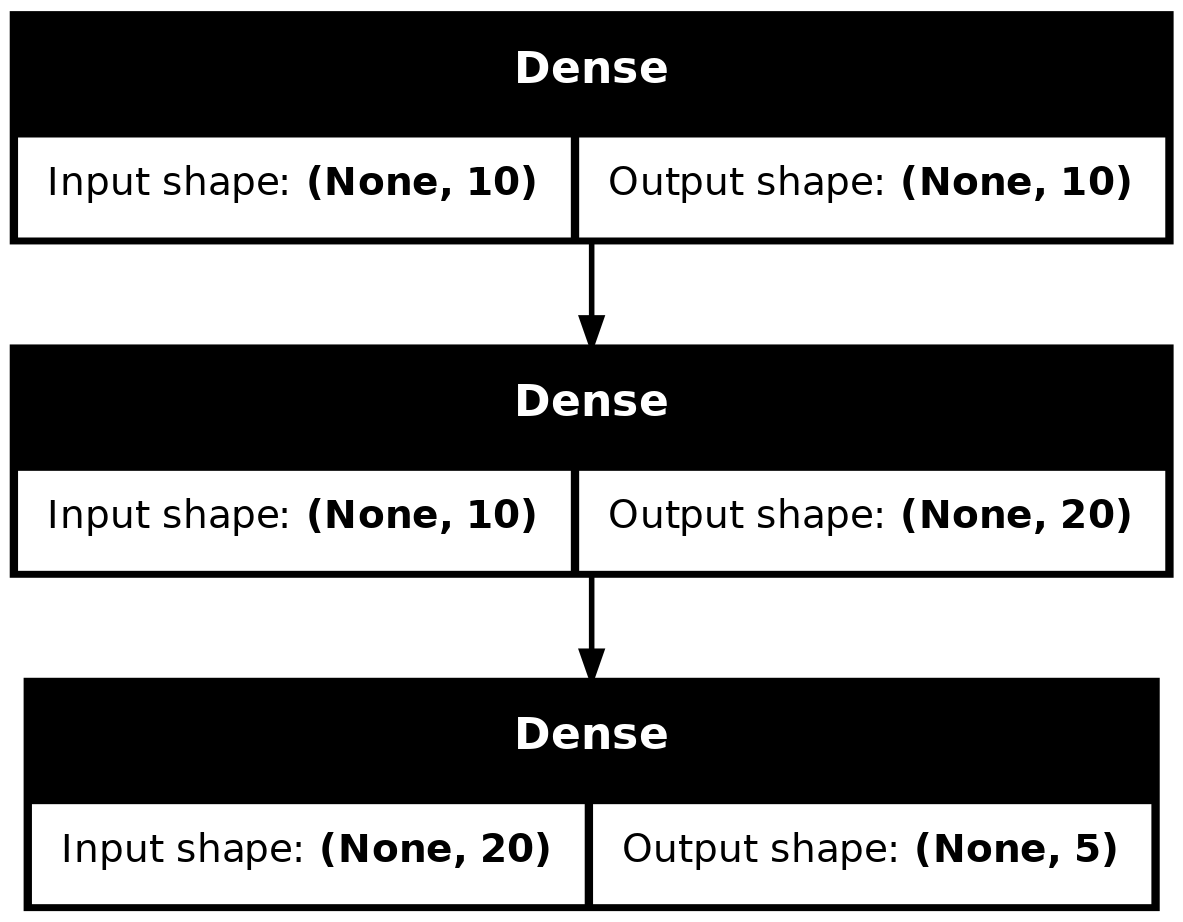

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Functional API
Но с помощью Sequential можно представить ограниченное (хоть и часто достаточное на практике) множество моделей. Представьте, что вам пригодилось реализовать такую модель:

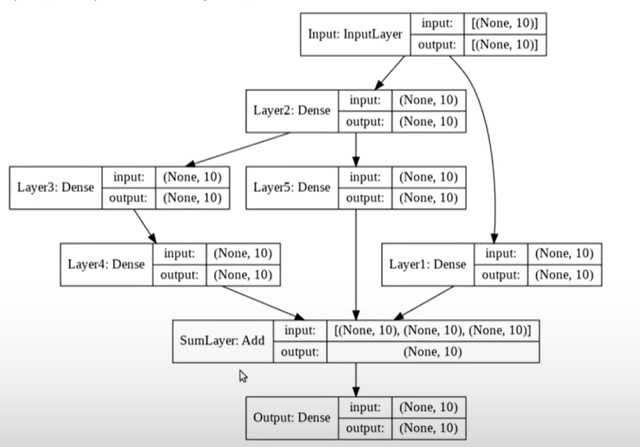

Реализовать такую модель с помощью Sequential нельзя. Но здесь к нам на помощь приходит Functional API.

Для понимания Functional API нужно начать относится к сети как к графу. В таком случае в роли вершин вступают слои, а ребра связывают выход одного слоя с входом другого. Иллюстрация выше как раз поможет это сделать.

Определять слои в коде мы уже умеем, теперь нужно научиться "рисовать стрелки". Для того чтобы это сделать нужно просто применить один слой к выходу другого! Рассмотрим пример ниже.

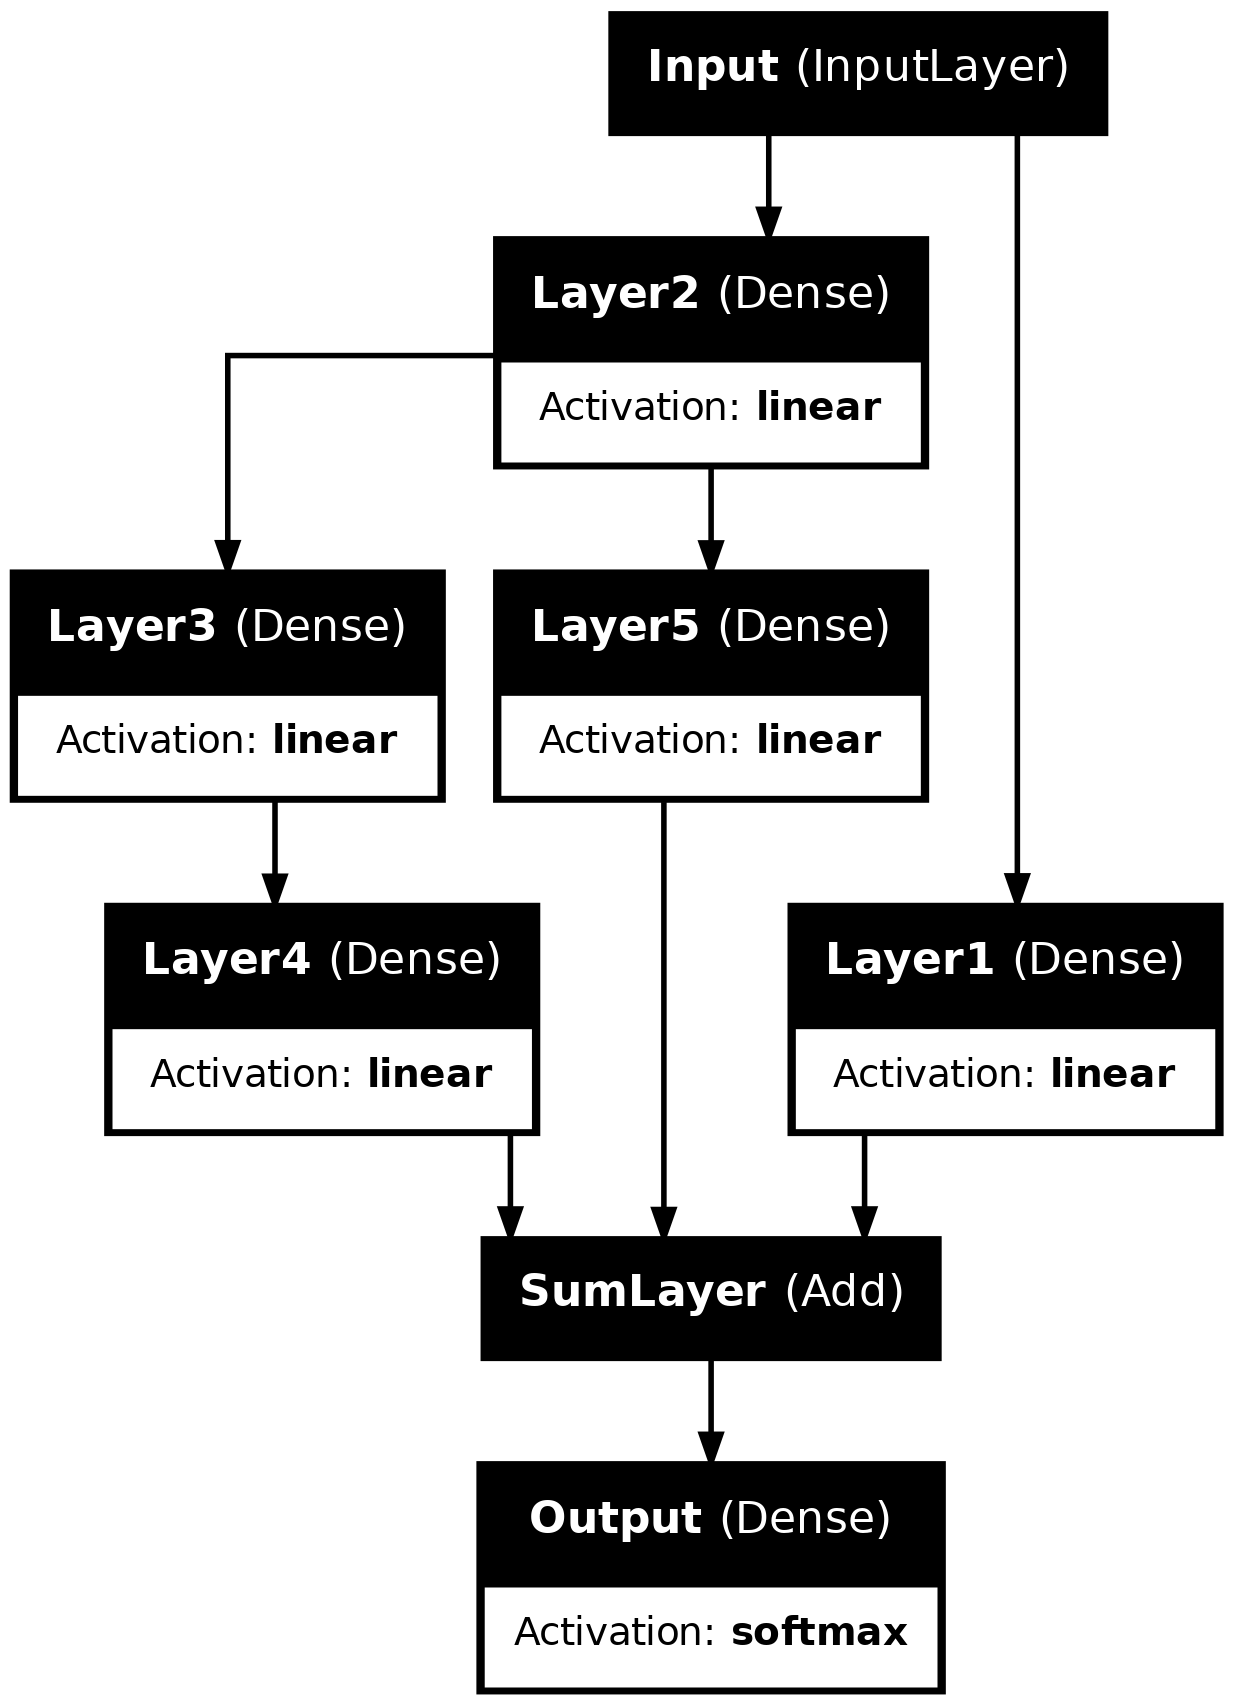

In [26]:
# cпециальный Инпут слой, показывает keras куда "положить" данные при использовании модели
input_layer = tf.keras.layers.Input(shape=(10, ), name="Input")
l1 = Dense(10, name="Layer1") # определили первый слой
l1_output = l1(input_layer) # соеденили его с инпутом, "нарисовали" самую правую стрелку на картинке выше

l2_output = Dense(10, name="Layer2")(input_layer) # дальше будем определять чуть компактнее
l3_output = Dense(10, name="Layer3")(l2_output)
l4_output = Dense(10, name="Layer4")(l3_output)

l5_output = Dense(10, name="Layer5")(l2_output)

# специальный слой, который сложит выходы всех слоев, которые ему передали
sum_output = tf.keras.layers.Add(name="SumLayer")([l1_output, l4_output, l5_output])

# выходной слой
output = Dense(10, name="Output", activation="softmax")(sum_output)

# создаем модель. нужно показать что мы считаем входом в нашу модель, а что выходом.
model = tf.keras.Model(inputs=input_layer, outputs=output)

tf.keras.utils.plot_model(model, show_shapes=False, show_layer_names=True, show_layer_activations=True)

In [23]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer2 (Dense)      │ (None, 10)        │        110 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer3 (Dense)      │ (None, 10)        │        110 │ Layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer1 (Dense)      │ (None, 10)        │        110 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer4 (Dense)      │ (None, 10)        │        110 │ Layer3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer5 (Dense)      │ (None, 10)        │        110 │ Layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SumLayer (Add)      │ (None, 10)        │          0 │ Layer1[0][0],     │
│                     │                   │            │ Layer4[0][0],     │
│                     │                   │            │ Layer5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 10)        │        110 │ SumLayer[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 660 (2.58 KB)

 Trainable params: 660 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

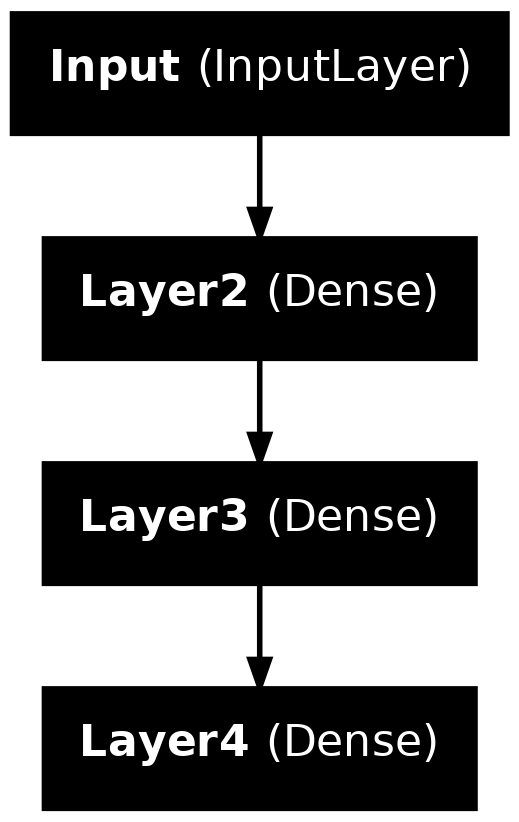

In [27]:
# если мы укажем в аутпутах слой, для вычисления которого не нужно было считать весь граф --
# keras автоматически обрежет граф.
model = tf.keras.Model(inputs=input_layer, outputs=l4_output)

tf.keras.utils.plot_model(model, show_shapes=False, show_layer_names=True)

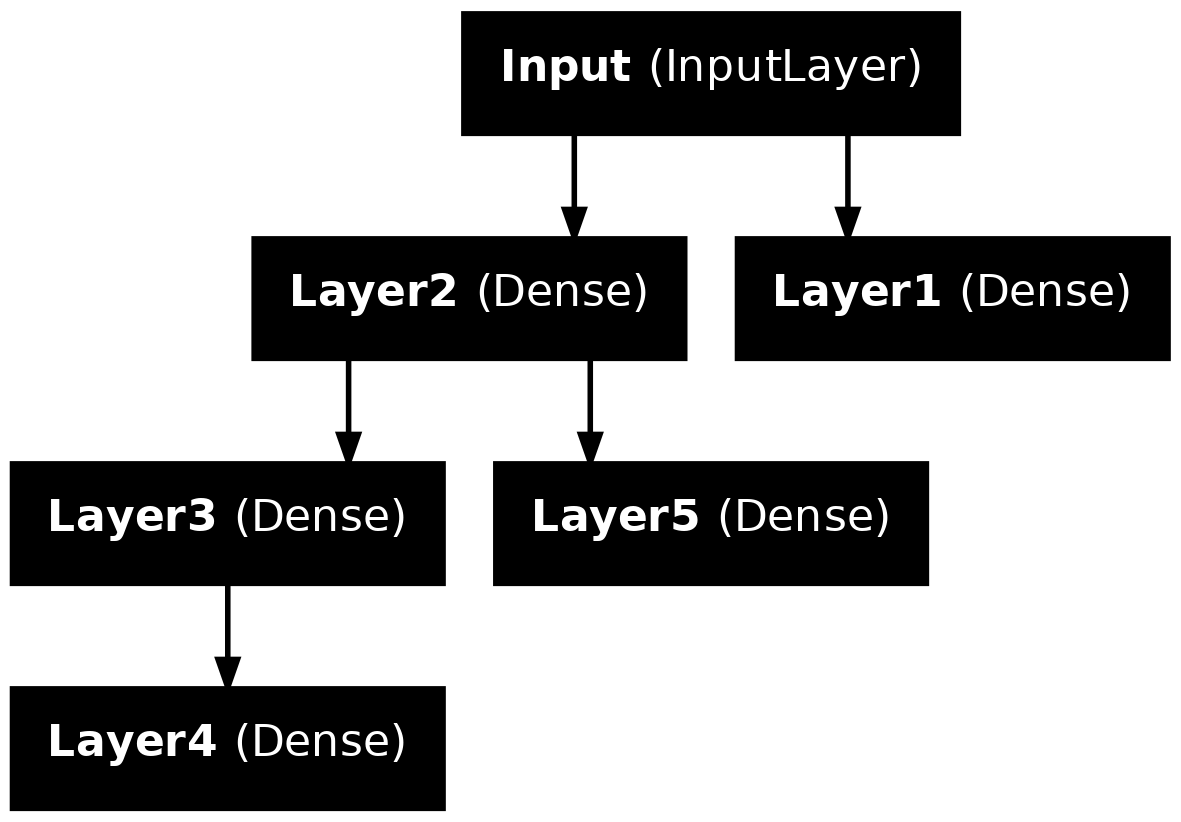

In [29]:
# можно указать несколько выходов
model = tf.keras.Model(inputs=input_layer, outputs=[l4_output, l5_output, l1_output])

tf.keras.utils.plot_model(model, show_shapes=False, show_layer_names=True)

## Заключение

Мы познакомились с одним из самых главных объектов в Keras -- модель. И сделали первый шаг -- научились ее определять.

Теперь вам не составит труда построить модель самостоятельно по ее описанию. Именно это вы и попробуете сделать на [практике](https://colab.research.google.com/drive/1OFKvrSYHU71O68uXcunQtTFJE4sLZW6E).

А как только вы почувствуете себя уверенно, мы перейдем к самому интересному -- обучению модели.

